

---


- Họ và tên: Mai Xuân Bách
- ID: 11200489
- Lớp: DSEB 62


---








In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
import torch.optim as optim # optimization algo
import torchvision
from torchvision import datasets, transforms

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Bài 1:
Cho bài toán XOR. Implement thuật toán neural network để giải bài toán dùng Pytorch


In [4]:
# XOR
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([[0], [1], [1], [0]])

In [5]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [6]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [8]:
# Define neural network
class XORNet(nn.Module): # nn.Module: base class for all PyTorch models
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer with 2 input neurons and 2 output neurons
        self.fc2 = nn.Linear(2, 1)  # Output layer with 2 input neurons and 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) # Sigmoid act. function
        x = torch.sigmoid(self.fc2(x))
        return x

# Create the neural network and specify the loss function and optimizer
net = XORNet()
criterion = nn.BCELoss() # Binary crossentropy
optimizer = optim.SGD(net.parameters(), lr=0.5) # Stochastic GD, net.parameters: get the parameters to optimize

# Training loop
for epoch in range(10000):
    optimizer.zero_grad() # clear the gradients of the model's parameters
    output = net(X) # forward pass
    loss = criterion(output, y)
    loss.backward() # computes gradients of the loss wrt parameters.
    optimizer.step() # updates the network's weights using the computed gradients.

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Test the trained network
with torch.no_grad(): #  don't need to compute gradients during testing.
    test_input = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = net(test_input)
    print("Predictions:")
    for i in range(len(predictions)):
        print(f"Input: {test_input[i].tolist()}, Output: {predictions[i].item()}")


Epoch 0: Loss = 0.8519583940505981
Epoch 1000: Loss = 0.693161129951477
Epoch 2000: Loss = 0.6931361556053162
Epoch 3000: Loss = 0.6931138038635254
Epoch 4000: Loss = 0.6930612325668335
Epoch 5000: Loss = 0.6927695870399475
Epoch 6000: Loss = 0.6689671874046326
Epoch 7000: Loss = 0.041227128356695175
Epoch 8000: Loss = 0.01382118184119463
Epoch 9000: Loss = 0.008142335340380669
Predictions:
Input: [0.0, 0.0], Output: 0.007222294341772795
Input: [0.0, 1.0], Output: 0.9948247671127319
Input: [1.0, 0.0], Output: 0.9948247671127319
Input: [1.0, 1.0], Output: 0.0053201476112008095


# Bài 2:
Cho dataset MNIST

Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch.

Chỉnh learning rate, vẽ đồ thị loss tương ứng.

Chia tập train/test tỉ lệ 80/20, tính các chỉ số tính các chỉ số accuracy, recall, f1-score trên tập test.


## Load MNIST data:
In the torchvision dataset - MNIST, dataloader has 60000 images as training set and 10000 images as the test set. Then, training set takes up about 85%. Then I use the default training set and  test set.

In [9]:
# Transform to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Tải dữ liệu MNIST
train_data = datasets.MNIST('data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('data', train=False, download=True, transform=transform)

# Chia thành tập train và valid
train_size = int(0.8 * len(train_data))
valid_size = len(train_data) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_data, [train_size, valid_size])

# DataLoader cho tập train, tập validation và tập test
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 105949403.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 60567846.91it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26666350.73it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14248712.62it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch.

In [10]:
# Định nghĩa kiến trúc mạng neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Lớp ẩn với 128 đơn vị
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)      # Lớp đầu ra với 10 đơn vị (số lớp đầu ra cho MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Định dạng lại tensor đầu vào
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Chỉnh learning rate, vẽ đồ thị loss tương ứng.

### lr = 0.001 (OK)

Epoch:   0 	 Train loss:  0.4122768641312917 	 Valid loss:  0.2643030084511067
Epoch:   1 	 Train loss:  0.21739554951091608 	 Valid loss:  0.196147909487023
Epoch:   2 	 Train loss:  0.15155559576054414 	 Valid loss:  0.17302858437153887
Epoch:   3 	 Train loss:  0.12173727811624606 	 Valid loss:  0.1434227379355976
Epoch:   4 	 Train loss:  0.1013889119612674 	 Valid loss:  0.11912709972920253
Epoch:   5 	 Train loss:  0.08774818686209619 	 Valid loss:  0.11732168545193494
Epoch:   6 	 Train loss:  0.07743029999764016 	 Valid loss:  0.13641925377057904
Epoch:   7 	 Train loss:  0.06871706326367955 	 Valid loss:  0.135406470783253
Epoch:   8 	 Train loss:  0.061798889711809656 	 Valid loss:  0.10816984829255083
Epoch:   9 	 Train loss:  0.057880774634269376 	 Valid loss:  0.11177050226685056
Epoch:   10 	 Train loss:  0.051800748655882974 	 Valid loss:  0.09800047588353838
Epoch:   11 	 Train loss:  0.046916708551036815 	 Valid loss:  0.11223041595385826
Epoch:   12 	 Train loss:  0.0

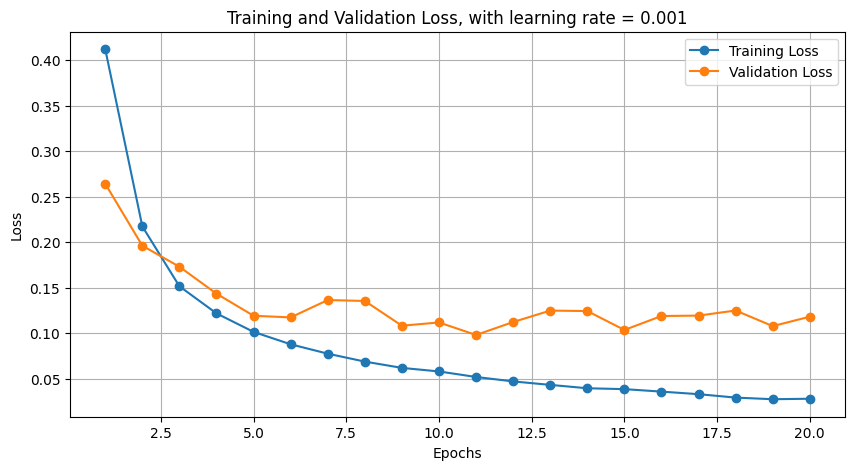

In [13]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 20
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

### lr = 0.00001 (lr bé)

Epoch:   0 	 Train loss:  1.9053067309061686 	 Valid loss:  1.5246749913438837
Epoch:   1 	 Train loss:  1.2669192077318827 	 Valid loss:  1.0530716884643474
Epoch:   2 	 Train loss:  0.921361163298289 	 Valid loss:  0.8077610632840623
Epoch:   3 	 Train loss:  0.7356482332547506 	 Valid loss:  0.6664689601735866
Epoch:   4 	 Train loss:  0.6246852873961131 	 Valid loss:  0.5787747096508107
Epoch:   5 	 Train loss:  0.5526169015963872 	 Valid loss:  0.5194326258720235
Epoch:   6 	 Train loss:  0.5029715067942937 	 Valid loss:  0.47799864966184535
Epoch:   7 	 Train loss:  0.4670788626273473 	 Valid loss:  0.44740926014616134
Epoch:   8 	 Train loss:  0.44002390708525974 	 Valid loss:  0.4234902214338171
Epoch:   9 	 Train loss:  0.41881095121304196 	 Valid loss:  0.4050121620455955


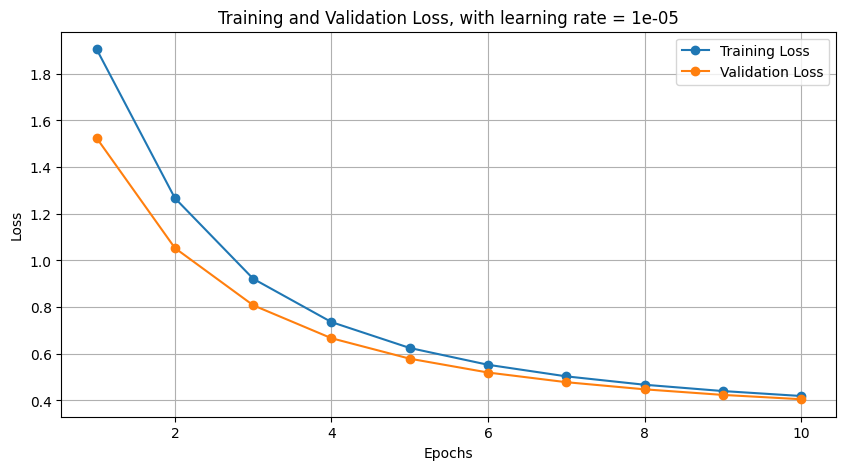

In [11]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 0.00001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 10
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

### lr = 1 (lr lớn)

Epoch:   0 	 Train loss:  170.58763542111714 	 Valid loss:  2.4067316359661994
Epoch:   1 	 Train loss:  2.365254176457723 	 Valid loss:  2.3262326248148653
Epoch:   2 	 Train loss:  2.3647225138346353 	 Valid loss:  2.3749380542876875
Epoch:   3 	 Train loss:  2.363716899871826 	 Valid loss:  2.3712087146779326
Epoch:   4 	 Train loss:  2.407582934379578 	 Valid loss:  2.4134428983039045
Epoch:   5 	 Train loss:  2.3709309333165485 	 Valid loss:  2.3250662075712327
Epoch:   6 	 Train loss:  2.368767733256022 	 Valid loss:  2.3465081757687507
Epoch:   7 	 Train loss:  2.3688594306310016 	 Valid loss:  2.3545260543518878
Epoch:   8 	 Train loss:  2.3659362510045368 	 Valid loss:  2.3553680891686297
Epoch:   9 	 Train loss:  2.363230050086975 	 Valid loss:  2.3594647328904332


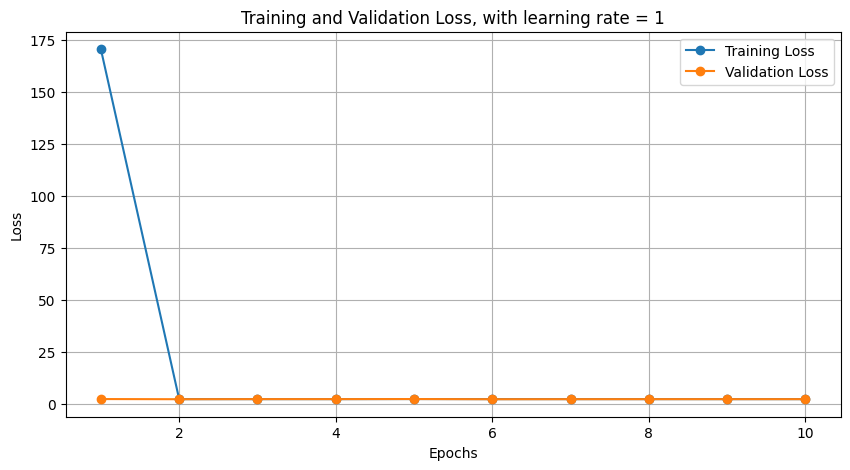

In [12]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 1
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 10
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

##  Tính các chỉ số classification trên tập test.

In [16]:
# Đánh giá mô hình trên tập test
model.eval()
test_loss = 0.0
predictions = []
targets = []

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()
    _, predicted = torch.max(output, 1)
    predictions.extend(predicted.numpy())
    targets.extend(target.numpy())

# Tính các chỉ số đánh giá
accuracy = accuracy_score(targets, predictions)
confusion_mat = confusion_matrix(targets, predictions)
classification_rep = classification_report(targets, predictions)

print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_mat)
print("Classification report: \n", classification_rep)


Accuracy:  0.9739
Confusion matrix: 
 [[ 958    0    4    3    0    3    8    1    2    1]
 [   0 1127    2    1    0    1    1    1    2    0]
 [   2    2  999   14    1    0    0   11    3    0]
 [   0    0    2  998    0    1    0    3    2    4]
 [   1    0    2    1  964    0    3    2    0    9]
 [   2    0    0   33    4  835   10    2    6    0]
 [   3    3    1    2    3    1  944    0    1    0]
 [   0    6    7    9    1    0    1  997    1    6]
 [   3    0    1   10    0    1    8    4  943    4]
 [   1    4    0    8   13    1    1    5    2  974]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.92      0.99      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.94      0.96       892
           6       0.97    

# Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4


- Do e được dùng nhiều trong các hàm tăng trưởng (exponential growth) -> thuận tiện trong việc sử dụng và công nhận rộng rãi.
- Cơ số e giúp tính đạo hàm dễ dàng và cho kết quả đẹp hơn. Trong backpropagation cần chain rule, thì việc đạo hàm dễ dàng hơn là cần thiết.
- Thuận tiện biểu diễn cho dạng xác suất